In [95]:
# import os  # when loading file paths
# import pandas as pd  # for lookup in annotation file
# import spacy  # for tokenizer
# import torch
# from torch.nn.utils.rnn import pad_sequence  # pad batch
# from torch.utils.data import DataLoader, Dataset
# from PIL import Image  # Load img
# import torchvision.transforms as transforms


# # We want to convert text -> numerical values
# # 1. We need a Vocabulary mapping each word to a index
# # 2. We need to setup a Pytorch dataset to load the data
# # 3. Setup padding of every batch (all examples should be
# #    of same seq_len and setup dataloader)
# # Note that loading the image is very easy compared to the text!

# # Download with: python -m spacy download en
# spacy_eng = spacy.load("en")


# class Vocabulary:
#     def __init__(self, freq_threshold):
#         self.itos = {0: "<PAD>", 1: "<SOS>", 2: "<EOS>", 3: "<UNK>"}
#         self.stoi = {"<PAD>": 0, "<SOS>": 1, "<EOS>": 2, "<UNK>": 3}
#         self.freq_threshold = freq_threshold

#     def __len__(self):
#         return len(self.itos)

#     @staticmethod
#     def tokenizer_eng(text):
#         return [tok.text.lower() for tok in spacy_eng.tokenizer(text)]

#     def build_vocabulary(self, sentence_list):
#         frequencies = {}
#         idx = 4

#         for sentence in sentence_list:
#             for word in self.tokenizer_eng(sentence):
#                 if word not in frequencies:
#                     frequencies[word] = 1

#                 else:
#                     frequencies[word] += 1

#                 if frequencies[word] == self.freq_threshold:
#                     self.stoi[word] = idx
#                     self.itos[idx] = word
#                     idx += 1

#     def numericalize(self, text):
#         tokenized_text = self.tokenizer_eng(text)

#         return [
#             self.stoi[token] if token in self.stoi else self.stoi["<UNK>"]
#             for token in tokenized_text
#         ]


# class FlickrDataset(Dataset):
#     def __init__(self, root_dir, captions_file, transform=None, freq_threshold=5):
#         self.root_dir = root_dir
#         self.df = pd.read_csv(captions_file)
#         self.transform = transform

#         # Get img, caption columns
#         self.imgs = self.df["image"]
#         self.captions = self.df["caption"]

#         # Initialize vocabulary and build vocab
#         self.vocab = Vocabulary(freq_threshold)
#         self.vocab.build_vocabulary(self.captions.tolist())

#     def __len__(self):
#         return len(self.df)

#     def __getitem__(self, index):
#         caption = self.captions[index]
#         img_id = self.imgs[index]
#         img = Image.open(os.path.join(self.root_dir, img_id)).convert("RGB")

#         if self.transform is not None:
#             img = self.transform(img)

#         numericalized_caption = [self.vocab.stoi["<SOS>"]]
#         numericalized_caption += self.vocab.numericalize(caption)
#         numericalized_caption.append(self.vocab.stoi["<EOS>"])

#         return img, torch.tensor(numericalized_caption)


# class MyCollate:
#     def __init__(self, pad_idx):
#         self.pad_idx = pad_idx

#     def __call__(self, batch):
#         imgs = [item[0].unsqueeze(0) for item in batch]
#         imgs = torch.cat(imgs, dim=0)
#         targets = [item[1] for item in batch]
#         targets = pad_sequence(targets, batch_first=False, padding_value=self.pad_idx)

#         return imgs, targets


# def get_loader(
#     root_folder,
#     annotation_file,
#     transform,
#     batch_size=32,
#     num_workers=8,
#     shuffle=True,
#     pin_memory=True,
# ):
#     dataset = FlickrDataset(root_folder, annotation_file, transform=transform)

#     pad_idx = dataset.vocab.stoi["<PAD>"]

#     loader = DataLoader(
#         dataset=dataset,
#         batch_size=batch_size,
#         num_workers=num_workers,
#         shuffle=shuffle,
#         pin_memory=pin_memory,
#         collate_fn=MyCollate(pad_idx=pad_idx),
#     )

#     return loader, dataset


# if __name__ == "__main__":
#     transform = transforms.Compose(
#         [transforms.Resize((224, 224)), transforms.ToTensor(),]
#     )

#     loader, dataset = get_loader(
#         "../input/flickr8k/Images/", "../input/flickr8k/captions.txt", transform=transform
#     )
    
# #     idx = 0
# #     img_arr = []
# #     caption_arr = []
# #     for idx, (imgs, captions) in enumerate(loader):
# #         for idx in range(4):
# #             img_arr.append(imgs[idx])
# #             caption_arr.append(captions[idx])
            
# #             plt.title(caption_arr[idx])
# #             plt.imshow(img_arr[idx].permute(1,2,0))  
# #         break
# #     break
    

# #     for idx, (imgs, captions) in enumerate(loader):
# #         print(imgs.shape)
# #         print(captions.shape)

In [96]:
# idx = 0
# img_arr = []
# caption_arr = []
# for idx, (imgs, captions) in enumerate(loader):
#     for idx in range(4):
#         img_arr.append(imgs[idx])
#         caption_arr.append(captions[idx])
            
#         print(captions[idx])
#         plt.imshow(img_arr[idx].permute(1,2,0))  
#         break
#     break

In [97]:
# converting text to numerical values
# we need to 1. make a vocbulary putting each word to an index
# We need to 2. setup a pytorch dataset to load the data
# We need to 3. setup padding for each batch so that the sequence length is the same
# We need to 4. setup the dataloader

import os
import spacy # tokenizer
import pandas as pd
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torchvision.transforms as transforms
import torch
import numpy as np

In [98]:
spacy_eng = spacy.load("en")

In [99]:
sample_df = pd.read_csv('../input/flickr8k/captions.txt')
sample_df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [100]:
class Vocabulary():
    def __init__(self, freq_threshold):
        self.itos = {0:"<PAD>",1:"<SOS>", 2:"<EOS>", 3:"<UNK>"}
        self.stoi = {"<PAD>":0, "<SOS>":1, "<EOS>":2, "<UNK>":3}
        
        self.freq_threshold = freq_threshold
        
        print("Vocabulary initialised!")
    
    def __len__(self):
        return len(self.itos)
    
    @staticmethod
    def tokenizer_eng(self,input):
        return [token.text.lower() for token in spacy_eng.tokenizer(input)]
    
    def build_vocabulary(self,sentence_list):
        frequency = {}
        idx = self.__len__()
        print(f'build vocab idx : {idx}')
        
        for sentence in sentence_list:
            for word in self.tokenizer_eng(self,sentence):
                if word not in frequency:
                    frequency[word] = 1
                else :
                    frequency[word] += 1
                
                if frequency[word] == self.freq_threshold:
                    
                    self.stoi[word] = idx
                    self.itos[idx] = word
#                     print(self.stoi[word], self.itos[idx])
                    idx += 1
        
    
    def numericalize(self, text):
        tokenized_text = self.tokenizer_eng(self,text)
        
        return [
            self.stoi[token] if token in self.stoi else self.stoi["<UNK>"] 
            for token in tokenized_text
        ]
    
                
        
        

In [101]:
class FlickrDataset(Dataset):
    def __init__(self, root_dir, csvpath, transform=None, freq_threshold=5):
#         super(FlickrDataset, self).__init__()
        
        self.root_dir = root_dir
        self.df = pd.read_csv(csvpath)
        
        self.img = self.df["image"]
        self.caption = self.df["caption"]
        self.transform = transform
        
        self.vocabulary = Vocabulary(freq_threshold)
        self.vocabulary.build_vocabulary(self.caption.tolist())
        
        self.n_samples = len(self.df)
        
        print("Flickr dataset initialised!")
        
    def __len__(self):
        return self.n_samples
    
    def __getitem__(self, index):
        caption = self.caption[index]
        image_id = self.img[index]
        image = Image.open(os.path.join(self.root_dir, image_id)).convert("RGB")
        
        if self.transform:
            image = self.transform(image)
        
        numericalized_caption = [self.vocabulary.stoi["<SOS>"]]
        numericalized_caption += self.vocabulary.numericalize(caption) 
        numericalized_caption.append(self.vocabulary.stoi["<EOS>"])
        
#         print(numericalized_caption)
#         print(torch.tensor(np.array(numericalized_caption,dtype=np.int32)))
        return image, torch.tensor(numericalized_caption)

In [102]:
class Mycollate():
    def __init__(self, pad_idx):
        self.pad_idx = pad_idx
        
    def __call__(self, batch):
        
#         print("My collate called !")
        imgs = [item[0].unsqueeze(0) for item in batch]
        imgs = torch.cat(imgs, dim=0)
        targets = [item[1] for item in batch]
        targets = pad_sequence(targets, batch_first=False, padding_value=self.pad_idx)
        
        return imgs, targets

In [103]:
def get_loader(root_folder, annotation_file, transform, batch_size=32, num_workers=8, shuffle=True, pin_memory=True):
    
    print("inside get_loader!")
    dataset = FlickrDataset(root_folder, annotation_file, transform=transform)
    
    pad_idx = dataset.vocabulary.stoi["<PAD>"]
    
    loader = DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        shuffle=shuffle,
        pin_memory=pin_memory,
        collate_fn=Mycollate(pad_idx=pad_idx),
    )
    
    return loader, dataset

In [104]:
import matplotlib.pyplot as plt

In [105]:
transform = transforms.Compose(
        [transforms.Resize((224,224)), transforms.ToTensor(),]
    )
    
loader, dataset = get_loader(
        "../input/flickr8k/Images/", "../input/flickr8k/captions.txt", transform=transform
    )

inside get_loader!
Vocabulary initialised!
build vocab idx : 4
Flickr dataset initialised!


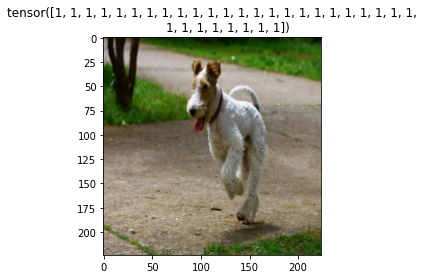

In [106]:
idx = 0
img_arr = []
caption_arr = []
for idx, (imgs, captions) in enumerate(loader):
    for idx in range(4):
        img_arr.append(imgs[idx])
        caption_arr.append(captions[idx])
            
        plt.title(caption_arr[idx])
        plt.imshow(img_arr[idx].permute(1,2,0))
            
        break
    break
    